In [40]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
G = nx.DiGraph()

In [41]:
# nx.add_path(G, [0, 1, 2, 0])
# thêm các đường dẫn 0->1->2->0

In [84]:
G.add_edge(2, 3, points=27)
G.add_edge(1, 2, points=20)
G.add_edge(0, 1, points=50)
G.add_edge(2, 0, points=50)
# thêm 1 cạnh từ node 2-> 3 với data weight = 5

In [85]:
weighted_degrees = dict(nx.degree(G,weight='weight'))

In [86]:
[e[2] for e in G.edges(data=True)]
# lặp tất cả các cạnh và trả ve data them nhu weith o e[2]

[{'points': 27}, {'points': 50}, {'points': 20}, {'points': 50}]

In [87]:
G.edges.data("points", default=1)

OutEdgeDataView([(2, 3, 27), (2, 0, 50), (1, 2, 20), (0, 1, 50)])

In [88]:
[e[2] for e in G.edges(data=True)]

[{'points': 27}, {'points': 50}, {'points': 20}, {'points': 50}]

In [89]:
G.out_degree(weight='points')
# số điểm ra của mỗi node với điểm tính bằng weight

OutDegreeView({2: 77, 3: 0, 1: 20, 0: 50})

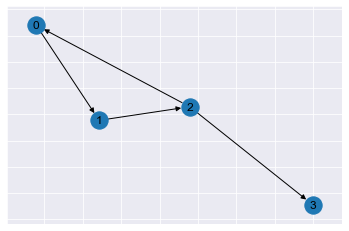

In [90]:
nx.draw_networkx(G)
# thực hiện vẽ networkx

In [91]:
print(nx.info(G))
# in ra thông tin của graph G

DiGraph with 4 nodes and 4 edges


In [92]:
dict(G.degree()).values()
# degree tra ve cap bac cua 1 node: in_degree + out_degree

dict_values([3, 1, 2, 2])

(array([1., 0., 0., 0., 0., 2., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

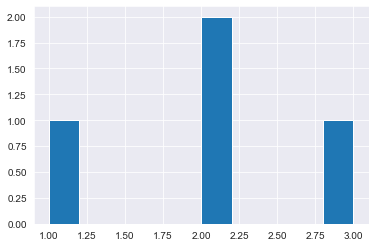

In [93]:
plt.hist(dict(G.degree()).values())
# vẽ 1 biểu đồ thể hiện số lần lặp lại của 1 giá trị(value)

In [94]:
nx.pagerank(G,alpha=1)

{2: 0.31578984160797924,
 3: 0.21052654260098952,
 1: 0.2631570731900417,
 0: 0.21052654260098952}

In [95]:
nx.betweenness_centrality(G)

{2: 0.5, 3: 0.0, 1: 0.3333333333333333, 0: 0.16666666666666666}

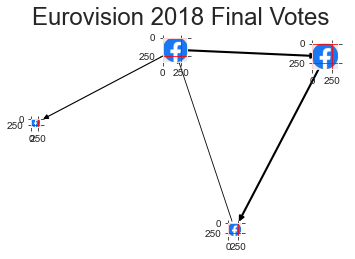

In [118]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize = 24)

# pos = nx.layout.fruchterman_reingold_layout(G,k=1,weight = 'points',iterations=1000,scale = 2)
pos = nx.spring_layout(G)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform


tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off', 'grid_color':'r'} #flag grid params
styles = ['dotted','dashdot','dashed','solid'] # line styles



# draw edges
for e in G.edges(data=True):
    width = e[2]['points']/24 #normalize by max points
    style='solid'
    # if width>0.4: #filter small votes
    nx.draw_networkx_edges(G,pos,edgelist=[e],width=width,
                               style=style )
#         # in networkx versions >2.1 arrowheads can be adjusted

# draw nodes
for node in G.nodes():
    imsize = max((0.3*G.degree(node,weight='points')/max(dict(G.degree(weight='points')).values()))**2,0.03)
    # size is proportional to the votes
    flag = mpl.image.imread('fb.png')

    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates

    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    # axes de ve lai hinh anh tu toa do bao nhieu va kick thuoc to nho.
    country.imshow(flag)
    # them anh vao axes da tao
    country.set_aspect('equal')
    # tao ti le voi truc x/y. co cac gia tri equal, auto, float
    country.tick_params(**tick_params)
# draw node new
# nx.draw_networkx_labels(G,pos)
# for node in G.nodes():
#     size = 100*weighted_degrees[node]*0.5
#     ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')
#     ns.set_edgecolor('#f2f6fa')

fig.savefig('images/test.png')

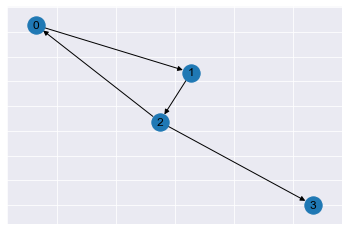

In [101]:
nx.draw_networkx(G)

In [98]:
x = [1, 2, 3]
y = np.array([[1, 2], [3, 4], [5, 6]])
plt.axes(x, y)

TypeError: axes() takes from 0 to 1 positional arguments but 2 were given